## Intro to TensorFlow and Music Generation with RNNs

In [161]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 0 - D Tensors

In [162]:
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.4456, tf.float64)

print("sport is a {} - D Tensor".format(tf.rank(sport).numpy()))
print("number is a {} - D Tensor".format(tf.rank(number).numpy()))

sport is a 0 - D Tensor
number is a 0 - D Tensor


### 1 - D Tensors

In [163]:
sport = tf.constant(["ksr","Kgr", "kk"], tf.string)
number = tf.constant([3.14, 5.23, 5.111, 3.22], tf.float64)

print("sport is a {} - D Tensor".format(tf.rank(sport).numpy(), tf.shape(sport)))
print("number is a {} - D Tensor". format(tf.rank(number).numpy(),tf.shape(number)))

sport is a 1 - D Tensor
number is a 1 - D Tensor


### higher-order Tensors 2D

In [164]:
matrix = tf.constant([[1.0, 2.0, 3.0, 4.0],[5.0, 6.0, 7.0, 8.0]])
matrix

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[1., 2., 3., 4.],
       [5., 6., 7., 8.]], dtype=float32)>

In [165]:
assert isinstance(matrix, tf.Tensor), " matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy()== 2

### higher- order Tensors 4D

In [166]:
images = tf.zeros([10, 256, 256,3])
images

<tf.Tensor: shape=(10, 256, 256, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


 

In [167]:
assert isinstance(images, tf.Tensor), " matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be a rank 4"
assert tf.shape(images). numpy(). tolist() == [10, 256, 256,3], "matrix is incorrect shape"

In [168]:
row_vector = matrix[1]
column_vector = matrix[:,2]
scalar = matrix[1, 2]

print("row_vector : {}".format(row_vector.numpy()))
print("column_vector : {}".format(column_vector.numpy()))
print("scalar : {}".format(scalar.numpy()))

row_vector : [5. 6. 7. 8.]
column_vector : [3. 7.]
scalar : 7.0


###  Computations on Tensors

In [169]:
a = tf.constant(15)
b = tf.constant(61)

c1 = tf.add(a,b)
c2 = a + b

print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


### A simple function in TensorFlow to construct this computation function

In [170]:
def func(a,b):
    c = tf.add(a,b)
    d = tf.subtract(b,1)
    e = tf.multiply(c,d)
    return e

In [171]:
a, b = 1.5, 2.5
e = func(a,b)
print(e)

tf.Tensor(6.0, shape=(), dtype=float32)


### Neural networks in TensorFlow

Defining a network Layer

In [172]:
class OurDenseLayer(tf.keras.layers.Layer):
    def __init__( self , n_output_nodes):
        super(OurDenseLayer, self).__init__()
        self.n_output_nodes = n_output_nodes
        
        
    def build(self, input_shape):
        d = int(input_shape[-1])
        self.w = self.add_weight("weight", shape = [d, self.n_output_nodes])
        self.b = self.add_weight("bias", shape = [1, self.n_output_nodes])
        
        
    def call(self, x):
        z = tf.matmul(x, self.w) + self.b
        
        y = tf.sigmoid(z)
        
        return y

In [173]:
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

### Defining a neural network using the Sequential API ###

In [174]:
#Import relevant packages 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the number of outputs
n_output_nodes = 1

# First define the model
model = Sequential()

dense_layer = Dense(n_output_nodes, activation = 'sigmoid')
model.add(dense_layer)

In [175]:
x_input = tf.constant([[1,2.,3]], shape=(1,3))
model_output = model(x_input).numpy()
print(model_output)

[[0.82812077]]


### Defining a model using subclassing

In [176]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):
    def __init__(self, n_output_nodes):
        super(SubclassModel, self).__init__()
        self.dense_layer = Dense(n_output_nodes, activation = 'sigmoid')
        
        
    def call(self,inputs):
        return self.dense_layer(inputs)

In [177]:
n_output_nodes = 3
model = SubclassModel(n_output_nodes)
x_inputs = tf.constant([[1,2.,3]], shape=(1,3))
print(model.call(x_inputs))

tf.Tensor([[0.31091353 0.6526125  0.42826605]], shape=(1, 3), dtype=float32)



### Defining a model using subclassing and specifying custom behavior

In [178]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class IdentityModel(tf.keras.Model):

  # As before, in __init__ we define the Model's layers
  # Since our desired behavior involves the forward pass, this part is unchanged
    def __init__(self, n_output_nodes):
        super(IdentityModel, self).__init__()
        self.dense_layer = tf.keras.layers.Dense(n_output_nodes, activation='sigmoid')
    
    def call(self, inputs, isidentity=False):
        x = self.dense_layer(inputs)
        if isidentity: 
            return inputs 
        return x


In [179]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.,3]], shape=(1,3))
out_activate = model.call(x_input)
out_identity = model.call(x_input, isidentity=True)
print("Network output with activation: {}; network identity output: {}".format(out_activate.numpy(), out_identity.numpy()))

Network output with activation: [[0.21081364 0.63709044 0.06765738]]; network identity output: [[1. 2. 3.]]


## Neural Network For Handwritten Digits Classification

In [180]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [181]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [182]:
len(X_train)

60000

In [183]:
len(y_train)

60000

In [184]:
len(X_test)

10000

In [185]:
X_train[0].shape

(28, 28)

In [186]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

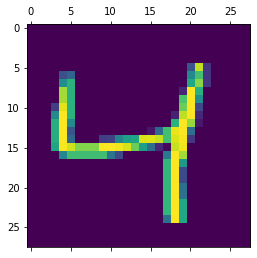

In [187]:
plt.matshow(X_train[2])

In [188]:
y_train[2]

4

### Step 1 we neeed to flatten the image data 2D to 1D 

In [189]:
X_train.shape

(60000, 28, 28)

## scaling 

In [190]:
X_train  = X_train /255
X_test = X_test/255

In [191]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [192]:
X_train_flattened.shape

(60000, 784)

In [193]:
X_test_flattened.shape

(10000, 784)

In [194]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [195]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [196]:
model = keras. Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation ='sigmoid')
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened, y_train, epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 4s 1ms/step - loss: 0.7210 - accuracy: 0.8166
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3178 - accuracy: 0.9135
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2884 - accuracy: 0.9191
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2706 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2657 - accuracy: 0.9263


In [197]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 985us/step - loss: 0.2731 - accuracy: 0.9239


[0.27314063906669617, 0.9239000082015991]

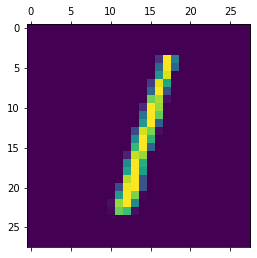

In [198]:
plt.matshow(X_test[2])

In [199]:
y_pred = model.predict(X_test_flattened)
y_pred[:5]

array([[1.95647180e-02, 2.77206510e-07, 3.27531099e-02, 9.60993886e-01,
        2.30431557e-03, 8.29923451e-02, 1.25570023e-06, 9.99805391e-01,
        7.56080747e-02, 5.67172527e-01],
       [3.99753988e-01, 4.52291965e-03, 9.98844504e-01, 5.21496356e-01,
        5.86832971e-10, 8.17793012e-01, 8.83539617e-01, 8.62125909e-13,
        2.07564086e-01, 1.61178426e-09],
       [3.66091728e-04, 9.91313457e-01, 6.41369283e-01, 3.53549659e-01,
        2.56192684e-02, 8.84180367e-02, 1.49273574e-01, 1.63658351e-01,
        3.88565034e-01, 4.26947176e-02],
       [9.99322295e-01, 2.38296831e-08, 5.21965325e-02, 9.77995992e-03,
        6.02387008e-05, 7.95637965e-02, 1.01550698e-01, 2.26463974e-02,
        2.71516740e-02, 1.27265155e-02],
       [3.25075686e-02, 3.62120009e-05, 9.24971998e-02, 3.43200564e-03,
        9.86906052e-01, 8.97195935e-03, 1.10246330e-01, 2.68416882e-01,
        2.91697711e-01, 7.02461839e-01]], dtype=float32)

In [200]:
np.argmax(y_pred[2])

1

In [201]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [202]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    0,    2,    0,    5,    6,    2,    3,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   6,    9,  901,   30,    9,    4,   11,   13,   47,    2],
       [   2,    0,   11,  939,    0,   14,    2,   12,   24,    6],
       [   2,    1,    2,    2,  926,    0,   11,    4,   11,   23],
       [   8,    2,    1,   50,    9,  749,   18,    7,   41,    7],
       [  12,    3,    5,    1,    7,    9,  915,    2,    4,    0],
       [   1,    5,   17,   10,    6,    0,    0,  965,    4,   20],
       [   5,    6,    5,   22,    9,   16,    8,   14,  885,    4],
       [  10,    6,    1,   12,   39,    5,    0,   36,   11,  889]])>

Text(69.0, 0.5, 'Truth')

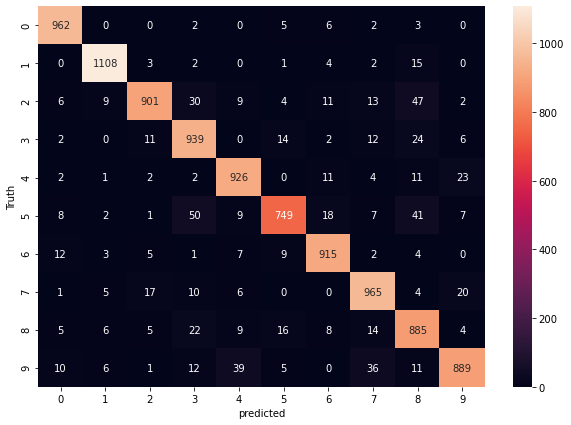

In [203]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True, fmt ='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

## model with hidden layer

In [205]:
model = keras. Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation ='relu'),
    keras.layers.Dense(10, activation ='sigmoid')
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4492 - accuracy: 0.8752
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1395 - accuracy: 0.9597
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0882 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0643 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0504 - accuracy: 0.9851


In [206]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0911 - accuracy: 0.9723


[0.09111325442790985, 0.9722999930381775]

In [210]:
y_pred = model.predict(X_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)

Text(69.0, 0.5, 'Truth')

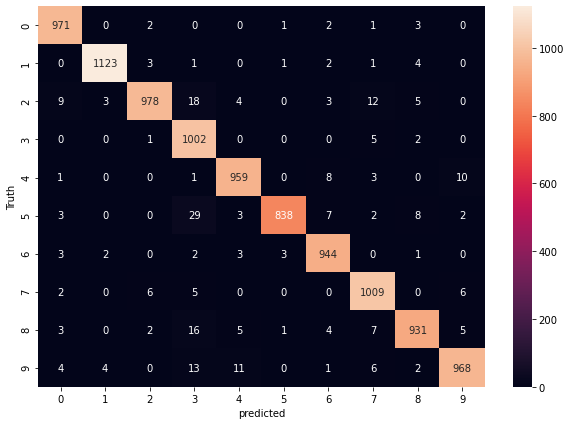

In [211]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True, fmt ='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [213]:
model = keras. Sequential([
    keras .layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation ='relu'),
    keras.layers.Dense(10, activation ='sigmoid')
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4539 - accuracy: 0.8735
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1404 - accuracy: 0.9591
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0906 - accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0647 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0520 - accuracy: 0.9841


In [214]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0846 - accuracy: 0.9719


[0.08456526696681976, 0.9718999862670898]